In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

In [2]:
base = pd.read_csv('AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
dateParse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv(
    'AirPassengers.csv',
    parse_dates = ['Month'],
    index_col = 'Month',
    date_parser = dateParse
)

In [5]:
ts = base['#Passengers']
type(ts)

pandas.core.series.Series

In [6]:
ts[1]

118

In [7]:
ts['1949-2-1']

118

In [8]:
ts[datetime(1949, 2, 1)]

118

In [9]:
ts['1950-01-01':'1950-12-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [10]:
ts[:'1950-12-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [11]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [12]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [13]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

In [14]:
ts.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

C:\Users\gfsil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


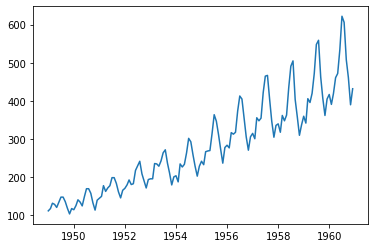

In [15]:
plt.plot(ts)

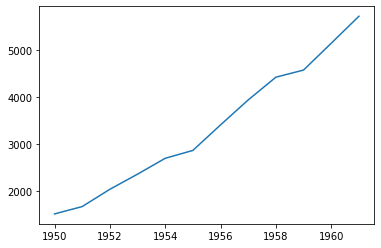

In [16]:
tsAno = ts.resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados
plt.plot(tsAno)

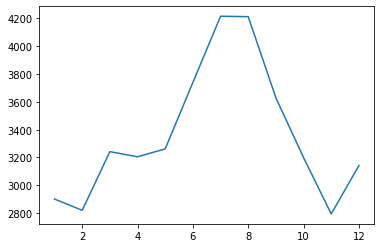

In [17]:
tsMes = ts.groupby([lambda x: x.month]).sum() # agrupamento por mes
plt.plot(tsMes)

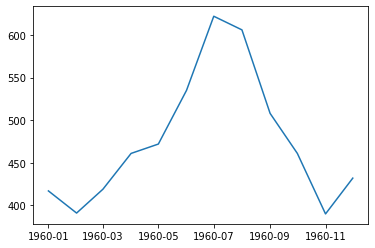

In [18]:
tsDatas = ts['1960-1-1':'1960-12-1']
plt.plot(tsDatas)

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
modelo = ARIMA(ts, order=(2, 1, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_tr = modelo.fit()
modelo_tr.summary()

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Wed, 12 Feb 2020   AIC                           1344.043
Time:                        11:49:04   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9099      0.065    -29.516      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.808      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

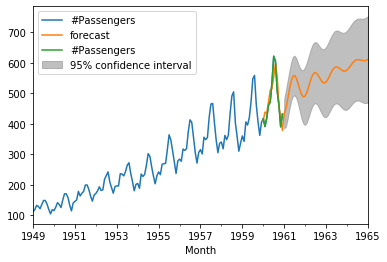

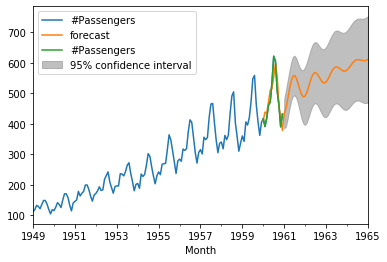

In [21]:
prev = modelo_tr.forecast(steps=12)
modelo_tr.plot_predict('1960-1-1', '1965-1-1',
                       ax = ts.plot(),
                       plot_insample=True
                      )

In [38]:
prev[0]

array([433.1184535 , 450.88777271, 479.81177127, 511.97329228,
       539.3253188 , 555.80847999, 558.7565744 , 549.28682259,
       531.66471658, 511.90257858, 496.02798746, 488.5051019 ])

In [23]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [29]:
train, test = train_test_split(ts, train_size=35)

In [30]:
model = pm.auto_arima(train, seasonal=True, m=12)

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gfsil\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); data is likely 

In [31]:
forecasts = model.predict(test.shape[0])  # predict N steps into the future

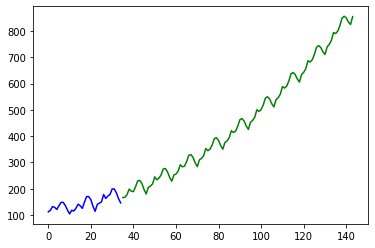

In [32]:
x = np.arange(ts.shape[0])
plt.plot(x[:35], train, c='blue')
plt.plot(x[35:], forecasts, c='green')

In [35]:
forecasts

array([166.17099191, 167.17697652, 177.41861128, 198.43301225,
       190.48057248, 188.74703458, 207.46458223, 229.77193695,
       231.08822672, 219.29864532, 196.71378939, 180.12755243,
       205.30158683, 210.14871232, 218.385769  , 245.13500636,
       234.03483039, 240.40850766, 252.38934552, 275.18234382,
       276.97862662, 264.47009997, 243.56861283, 228.66661802,
       251.9870228 , 255.7159727 , 266.53504583, 290.96744641,
       283.17287697, 285.72806184, 303.28623552, 327.08500305,
       329.89063173, 319.15034849, 298.49650088, 283.84159278,
       309.64846742, 315.39836342, 325.89625489, 353.10832372,
       344.53455844, 350.8199215 , 366.16095229, 390.63626269,
       394.11617031, 383.56980311, 364.07237526, 350.57423683,
       376.12040838, 381.90426603, 393.91862665, 420.68440523,
       413.91702046, 419.15444459, 437.21203992, 462.57228513,
       466.93856057, 457.58261874, 438.66637579, 425.74920078,
       452.77356008, 459.84909016, 472.21673355, 500.57